# Visualise mortality

ggtree v3.16.0 Learn more at https://yulab-smu.top/contribution-tree-data/

Please cite:

Shuangbin Xu, Lin Li, Xiao Luo, Meijun Chen, Wenli Tang, Li Zhan, Zehan
Dai, Tommy T. Lam, Yi Guan, Guangchuang Yu. Ggtree: A serialized data
object for visualization of a phylogenetic tree and annotation data.
iMeta 2022, 1(4):e56. doi:10.1002/imt2.56


Attaching package: ‘ggtree’


The following object is masked from ‘package:ape’:

    rotate



Attaching package: ‘dplyr’


The following object is masked from ‘package:ape’:

    where


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Rows: 3084 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tube_code
dbl (4): PATIENT_ID, death_7_day, death_14_day, death_30_day

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column typ

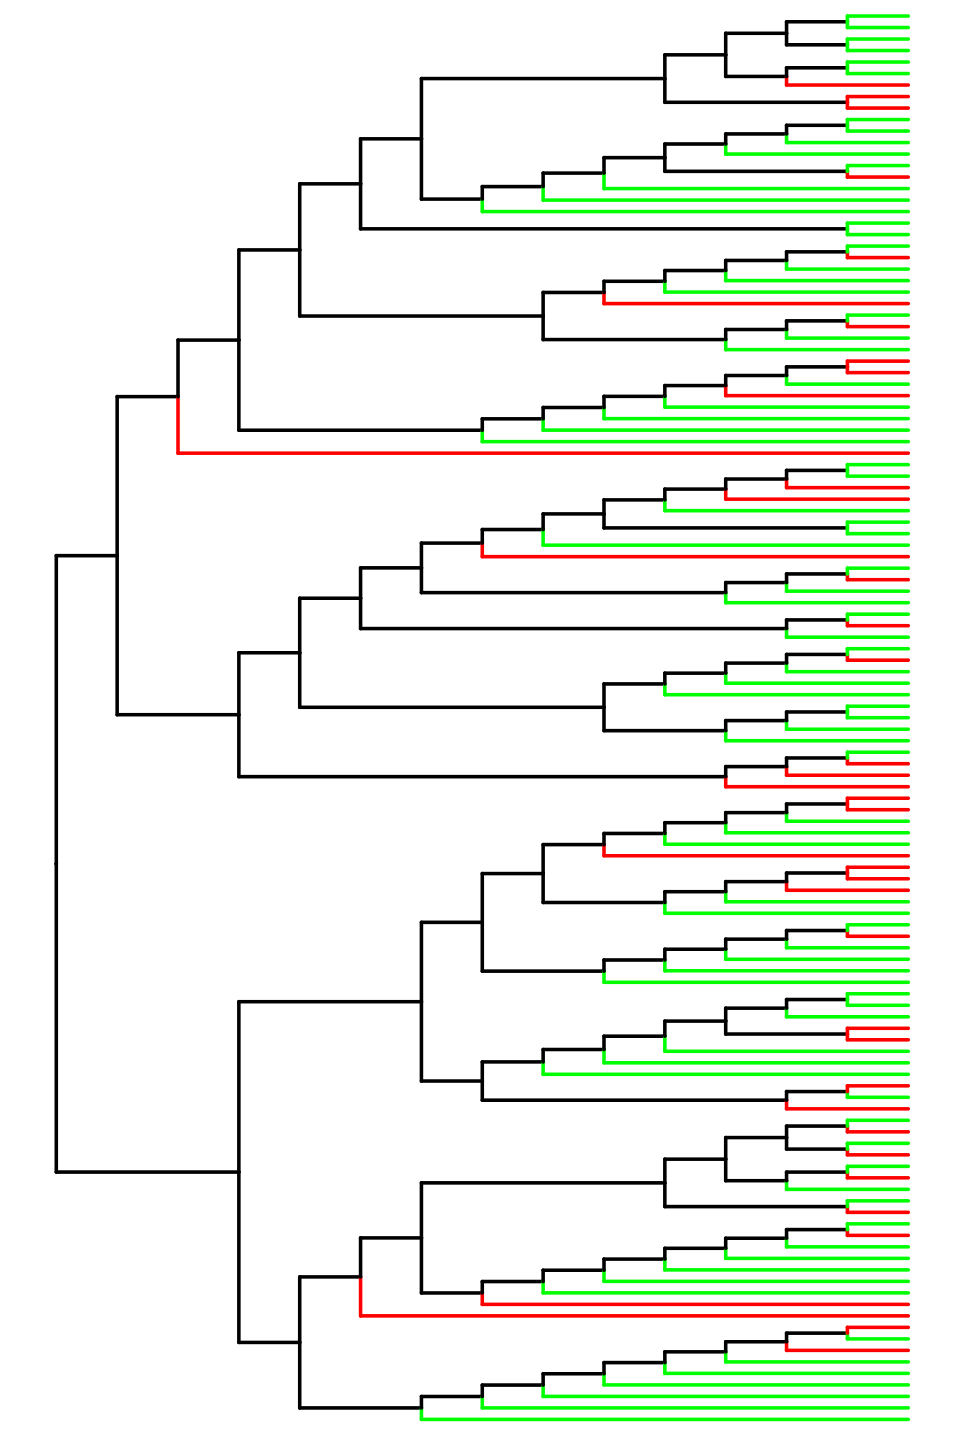

In [1]:
options(repr.plot.width = 8, repr.plot.height = 12)

library(ape)
library(ggtree)
library(ggplot2)
library(dplyr)
library(readr)  # for read_csv

# Load tree
tree <- read.tree(
  "~/workspace/genome_data/annotations/s_aureus/gene_sequences/essC/sample/tree.nwk"
)

# Load mortality data
mortality_df <- read_csv(
  "~/workspace/ehr_data/data/full_cohort/tube_id_mortality_labels.csv"
)  # adjust path
# Ensure the column names are: tip and mortality (0 or 1)

# Generate initial ggtree plot to access data
p <- ggtree(tree, branch.length = "none")

# Extract ggtree data
tree_data <- p$data

# Add 'tip' label only for terminal nodes
tree_data <- tree_data %>%
  mutate(tip = ifelse(isTip, label, NA))

# Merge mortality labels for tips
tree_data <- left_join(tree_data, mortality_df, by = c("tip" = "tube_code"))

# Assign color based on mortality
tree_data$branch_color <- ifelse(
  tree_data$isTip, ifelse(tree_data$death_7_day == "1", "red", "green"), "black"
)  # internal branches = black

# Re-plot with colored branches
p <- ggtree(tree, branch.length = "none") %<+% tree_data +
  geom_tree(size = 1, aes(color = I(branch_color)))

p

Rows: 3084 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tube_code
dbl (4): PATIENT_ID, death_7_day, death_14_day, death_30_day

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Average angle change [1] 0.0419388519144911



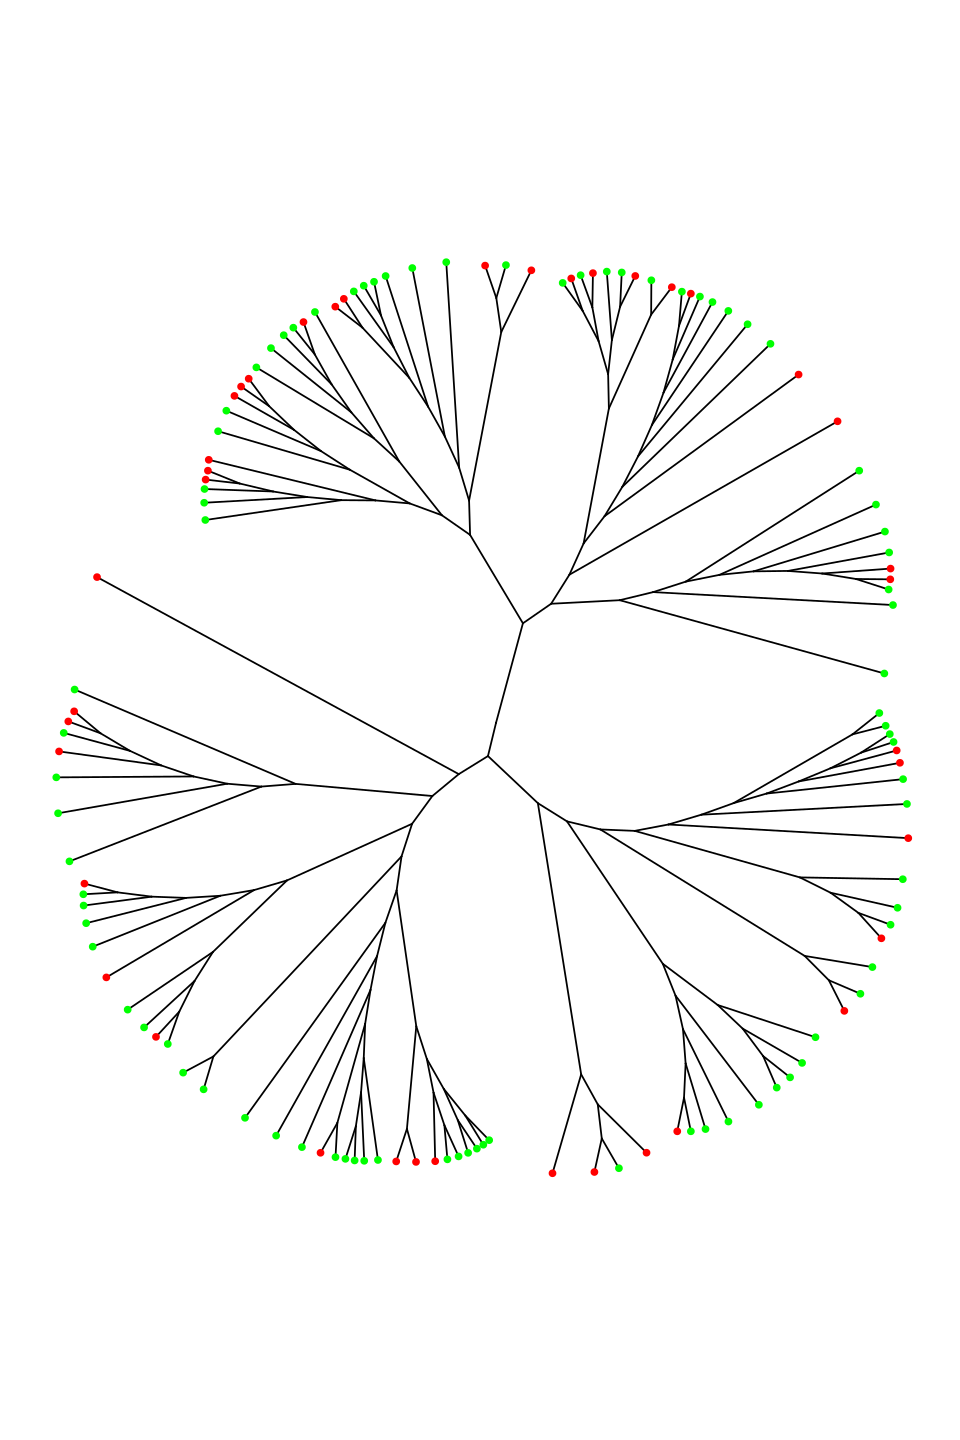

In [2]:
options(repr.plot.width = 8, repr.plot.height = 12)

library(ape)
library(ggtree)
library(ggplot2)
library(dplyr)
library(readr)  # for read_csv

# Load tree
tree <- read.tree(
  "~/workspace/genome_data/annotations/s_aureus/gene_sequences/essC/sample/tree.nwk"
)

# Load mortality data
mortality_df <- read_csv(
  "~/workspace/ehr_data/data/full_cohort/tube_id_mortality_labels.csv"
)  # adjust path
# Ensure the column names are: tip and mortality (0 or 1)

# Generate initial ggtree plot to access data
p <- ggtree(tree, branch.length = "none")

# Extract ggtree data
tree_data <- p$data

# Add 'tip' label only for terminal nodes
tree_data <- tree_data %>%
  mutate(tip = ifelse(isTip, label, NA))

# Merge mortality labels for tips
tree_data <- left_join(tree_data, mortality_df, by = c("tip" = "tube_code"))

# Assign color based on mortality
tree_data$branch_color <- ifelse(
  tree_data$isTip, ifelse(tree_data$death_7_day == "1", "red", "green"), "black"
)  # internal branches = black

# Re-plot with colored branches
p <- ggtree(tree, layout = "daylight", branch.length = "none") %<+% tree_data +
  geom_tippoint(aes(color = I(branch_color)))

p

Rows: 3084 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tube_code
dbl (4): PATIENT_ID, death_7_day, death_14_day, death_30_day

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


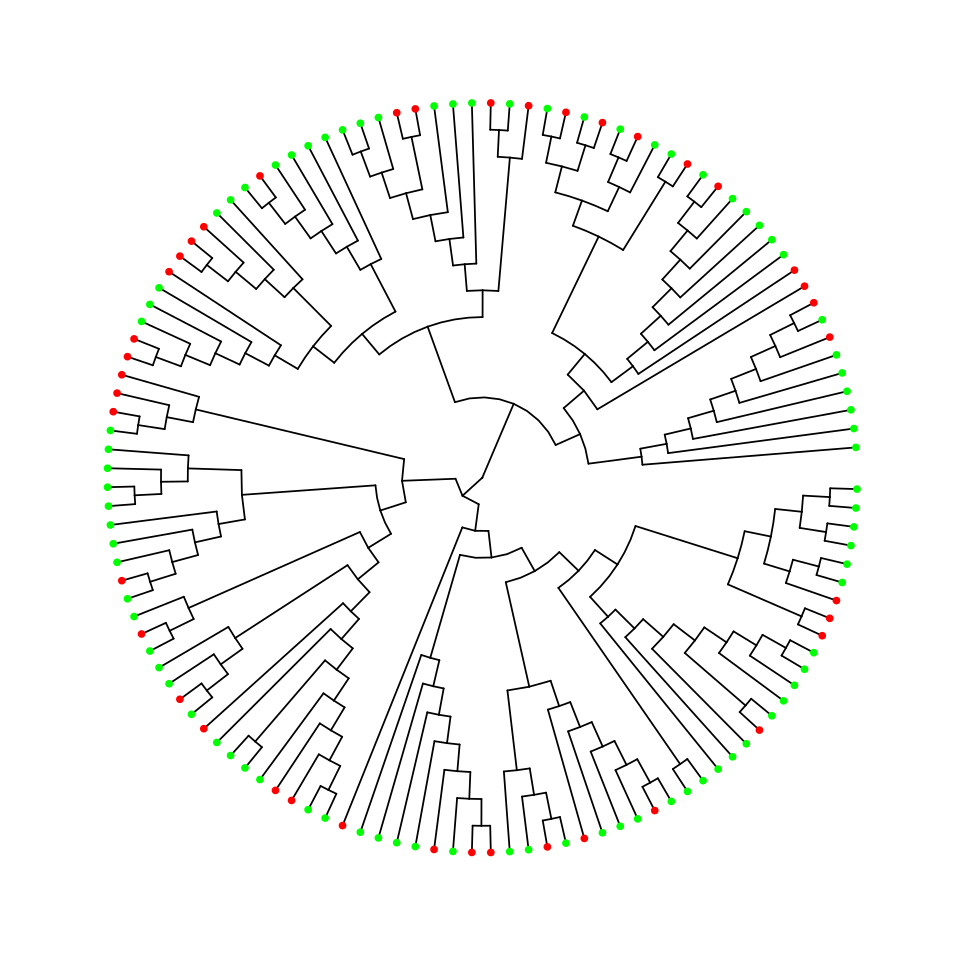

In [3]:
options(repr.plot.width = 8, repr.plot.height = 8)

library(ape)
library(ggtree)
library(ggplot2)
library(dplyr)
library(readr)  # for read_csv

# Load tree
tree <- read.tree(
  "~/workspace/genome_data/annotations/s_aureus/gene_sequences/essC/sample/tree.nwk"
)

# Load mortality data
mortality_df <- read_csv(
  "~/workspace/ehr_data/data/full_cohort/tube_id_mortality_labels.csv"
)  # adjust path
# Ensure the column names are: tip and mortality (0 or 1)

# Generate initial ggtree plot to access data
p <- ggtree(tree, branch.length = "none")

# Extract ggtree data
tree_data <- p$data

# Add 'tip' label only for terminal nodes
tree_data <- tree_data %>%
  mutate(tip = ifelse(isTip, label, NA))

# Merge mortality labels for tips
tree_data <- left_join(tree_data, mortality_df, by = c("tip" = "tube_code"))

# Assign color based on mortality
tree_data$death_7_day_color <- ifelse(
  tree_data$isTip, ifelse(tree_data$death_7_day == "1", "red", "green"), "black"
)  # internal branches = black

# Re-plot with colored branches
p <- ggtree(tree, branch.length = "none", layout = "circular") %<+% tree_data +
  geom_tippoint(aes(color = I(death_7_day_color)))

p


Attaching package: ‘tidyr’


The following object is masked from ‘package:ggtree’:

    expand


Rows: 3084 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tube_code
dbl (4): PATIENT_ID, death_7_day, death_14_day, death_30_day

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


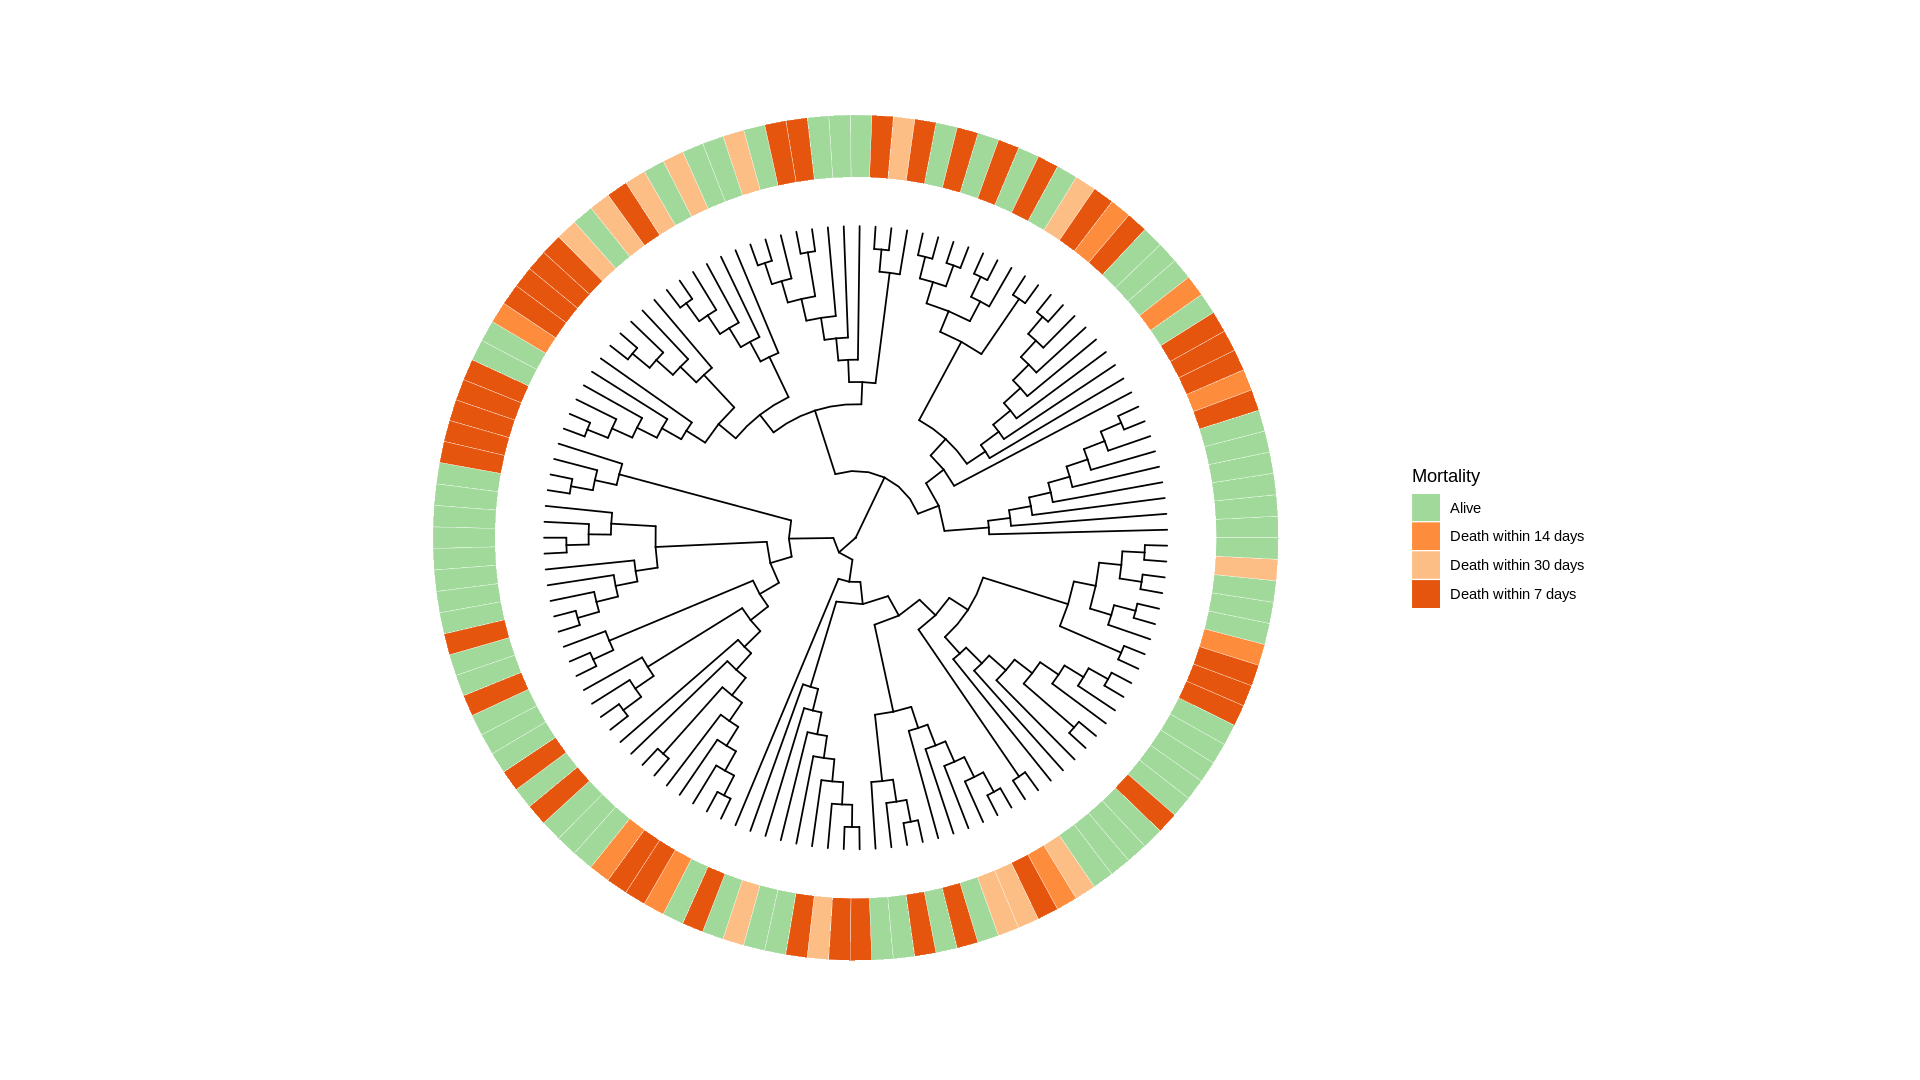

In [4]:
options(repr.plot.width = 16, repr.plot.height = 9)

library(ape)
library(ggtree)
library(ggplot2)
library(dplyr)
library(readr)
library(tidyr)

tree <- read.tree(
  "~/workspace/genome_data/annotations/s_aureus/gene_sequences/essC/sample/tree.nwk"
)

mortality_df <- read_csv(
  "~/workspace/ehr_data/data/full_cohort/tube_id_mortality_labels.csv"
)

mortality_df <- mortality_df %>%
  mutate(
    death_category = ifelse(
      (death_7_day == "1"),
      "Death within 7 days",
      ifelse(
        (death_14_day == "1"),
        "Death within 14 days",
        ifelse(
          (death_30_day == "1"),
          "Death within 30 days",
          "Alive"
        )
      )
    )
  ) %>%
  select(-death_7_day, -death_14_day, -death_30_day)

df <- data.frame(tube_code = tree$tip.label)

heatmap_data <- df %>%
  left_join(mortality_df, by = "tube_code")

circ <- ggtree(tree, layout = "circular", branch.length = "none")

rownames(heatmap_data) <- heatmap_data$tube_code
heatmap_data <- heatmap_data[
  , c("death_category"), drop = FALSE
]

heatmap_data <- heatmap_data %>%
  mutate(death_category = replace_na(death_category, "Alive"))

heatmap_data$death_category <- factor(
  heatmap_data$death_category,
  levels = c(
    "Alive",
    "Death within 30 days",
    "Death within 14 days",
    "Death within 7 days"
  )
)

p <- gheatmap(
  circ,
  heatmap_data,
  offset = .8,
  width = .2,
  colnames = FALSE,
) +
  scale_fill_manual(
    values = c(
      "Alive" = "#A1D99B",
      "Death within 30 days" = "#FDBE85",
      "Death within 14 days" = "#FD8D3C",
      "Death within 7 days" = "#E6550D"
    ),
    name = "Mortality"
  )

p